In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [28]:
ratings =pd.read_csv('/Users/Pawan Kumar/Downloads/BX-Book-Ratings.csv', encoding='iso-8859-1')

In [29]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [4]:
books =pd.read_csv('/Users/Pawan Kumar/Downloads/BX-Books.csv', encoding='iso-8859-1')
Users =pd.read_csv('/Users/Pawan Kumar/Downloads/BX-Users.csv', encoding='iso-8859-1')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
books.head()

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
df = ratings.merge(Users, on='user_id', how='inner')

In [9]:
df = df.merge(books, on='isbn', how= 'inner')

In [10]:
df.isna().sum()

user_id                     0
isbn                        0
rating                      0
Location                    0
Age                    250611
book_title                  0
book_author                 1
year_of_publication         0
publisher                   2
dtype: int64

In [238]:
df ['isbn']=df['isbn'].str[:-2].astype(int)

In [12]:
df = df[['user_id','isbn','rating']]

In [13]:
df

,user_id,isbn,rating
0,2,195153448,0
1,8,2005018,5
2,11400,2005018,0
3,11676,2005018,8
4,41385,2005018,0
...,...,...,...
932708,250764,451157516,0
932709,250764,451400763,0
932710,250764,048623715X,0
932711,250764,486256588,0


In [240]:
df = df.dropna()

In [14]:
df.isnull().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [74]:
import re
ratings.isbn = ratings.isbn.str.replace(r'[A-B]', 0)
ratings.isbn = ratings.isbn.str.replace('2.02.0321', 0).astype(int)
# ratings.isbn = ratings.isbn.str.replace('',"").astype(int)
ratings.isbn

TypeError: repl must be a string or callable

In [15]:
df.rating.unique()

array([ 0,  5,  8,  9,  7,  6, 10,  4,  3,  2,  1], dtype=int64)

In [30]:
ratings= ratings.iloc[:10000, :]

In [52]:
from sklearn.model_selection import train_test_split
n_users = ratings.user_id.unique().shape[0] 
n_isbn = ratings.isbn.unique().shape[0]
train_data, test_data = train_test_split(ratings, test_size=0.25)

In [53]:
n_users, n_isbn

(941, 3110)

In [59]:
train_data_matrix = np.zeros((n_users, n_isbn))
for line in train_data.itertuples():
    #[user_id index, movie_id index] = given rating.
#     train_data_matrix[line[1]-1, line[2]-1] = line[3] 
    print(line[2])
train_data_matrix

2020200
059044
156205
45113
74341
972851
89577
37305
37572
38549
349210
59097
42517
44040
44022
59029
31287
45228
39512
37316
34536
55357
840200
83175
068416
69811
44022
155782
89997
202054
44922
47121
20135
185326
39913
59044
38077
71800
44660
44651
44021
59025
37322
68483
073570
88415
157719
654
67152
55357
14029
6103
59043
42518
037326
78531
37309
82173
45116
44920
33031
37324
31296
37329
44661
34540
71726
37309
39483
37302
30710
37303
067175
57368
52341
67161
351811
155723
67178
44019
31298
037326
37324
59025
14054
34539
38526
45120
83621
39488
76534
37325
379153
2863
37347
67172
42512
2705
59067
93294
78681
14600
344272
42509
44021
31296
38089
842366
87140
37348
31677
34543
80078
37370
38533
42512
37370
286869
96137
37329
188490
156691
6025
58252
38530
155054
67170
972413
002542
84395
67086
185326
67974
78686
30702
349802
37451
37311
344244
30711
847888
30711
78211
842395
81120
842044
31295
067941
42514
75640
84394
67187
42514
37309
81725
38076
67175
70970
6270
14055
67173
81255
3

30717
37310
44651
89954
72510
42510
55208
14032
30702
156987
6440
88677
78530
30717
67973
37316
82172
37316
67103
96176
81674
284116
42518
48628
6106
79312
30710
157778
69100
44022
45140
44660
280013
6440
37327
39482
48629
14034
37322
55358
155166
37303
44040
59040
59069
44023
59052
37311
45152
44639
30707
37311
37303
81251
280361
37316
157840
6106
6096
067150
33037
052165
71660
67102
207056
44920
55305
67102
030713
38000
59066
159308
52342
80504
59022
37311
74345
37387
059099
59011
881715
31201
059041
55381
30700
344243
225305
67943
972711
6103
68804
37370
067172
59033
225314
155748
50552
82174
37303
6104
37311
59056
157174
82175
157748
31219
034543
59043
73944
354825
38077
55380
972844
30711
45119
051512
44660
68485
74320
188003
325720
156731
52544
34535
842265
9941
155591
55327
15205
31285
76422
44660
30759
67476
67973
38532
89577
37303
78670
157064
55326
155661
42516
67104
31656
44634
44012
038076
43912
88038
44022
37309
14029
37572
34554
6023
6097
30700
55327
189208
37322
67167
15

972665
67173
651
59043
6108
67102
84993
076534
30710
44022
091636
68484
55305
82498
37319
39537
6440
67101
89943
34911
30730
44019
67157
14024
45115
37602
42510
843760
37322
44024
155661
059049
34533
44922
14101
059093
38077
69001
44638
68486
037308
88677
37324
880446
044019
068482
35612
81672
315000
68480
31669
31294
38548
344209
155166
67104
67986
155166
849607
43954
44652
39483
157322
030712
286432
34544
354860
37322
78290
38077
188712
67980
22640
6440
37329
157082
67163
37316
884521
38079
57004
80410
44630
31285
51510
907041
972662
59049
80410
74931
55322
6009
39483
972844
7.80
207033
207040
81674
81673
6092
37329
44640
044023
30700
55321
67162
37310
972844
185326
44914
225317
37305
68980
37310
068822
59046
53106
34546
67152
30710
051512
34528
83620
19282
55324
39489
51512
57115
905721
68482
37370
15241
226612
14003
59044
44660
44660
44508
37370
30758
38547
44020
67985
31689
157513
059035
30711
189037
39484
30703
67230
14030
45119
6091
158728
30702
55344
44635
43909
31610
34065
888

44050
51508
6093
325720
86573
37311
59067
972608
286930
59045
37325
59049
44024
81671
59042
030710
55321
30798
2738
972232
68487
44660
74343
42511
44010
67164
44810
158865
30711
842064
226402
81094
6080
156987
360893
207042
2862
30712
347354
34538
6091
37329
39913
42509
55320
37575
78970
44145
081672
3018
284055
82172
84990
37576
37309
067172
270242
31299
81293
44022
37326
42514
67163
31224
059027
55348
59040
44809
87406
87509
156173
31022
67986
68817
39914
19281
972844
6105
9954
30713
37303
44636
44660
38076
30701
6017
55327
82630
30711
6105
044841
202058
37319
38547
30711
59044
84311
39731
15205
067157
39915
39537
81251
37324
59046
156156
75283
157657
44015
81255
51513
6026
68982
089104
42512
059033
155882
55325
89375
59031
55358
44021
34540
37312
52594
37322
055321
67186
30710
55327
55344
34534
38084
68807
30712
59052
59047
14143
155853
156156
51510
55357
38551
59044
156884
068971
972290
67102
037322
67013
37326
68484
89296
972381
44990
080505
59076
67103
39482
6107
30730
37370
3948

38547
42519
059067
55358
972710
37387
74320
38523
37303
44021
37302
1501
37575
059011
37370
37345
6440
89471
67178
43926
34077
44809
076534
188132
30711
45226
39914
68417
25609
155166
034543
067987
155166
904171
14024
74724
59064
88798
68985
67101
38550
37376
157973
972290
39470
31216
51755
653
157297
44540
59044
158229
37305
44044
38076
37570
6091
38548
226403
6105
55356
59093
43921
006107
44023
60980
849527
155166
81094
42514
45117
45141
37452
156691
67153
37311
2042
55356
225314
67173
38072
880446
87123
74322
38073
081674
81674
43916
67153
74346
55326
6097
59062
44652
55326
51512
37312
6019
30701
37324
340414
37576
74340
59056
042511
44020
156476
84232
42518
844507
202055
14200
42516
55305
37380
30702
67946
67980
157230
39497
94340
55314
68817
37319
55328
81252
044840
81164
38530
89443
44015
30798
31666
86318
37303
38548
34535
875590
345312
37310
325723
059088
39913
37370
37310
55305
68482
074343
39568
80505
80501
188961
190085
44636
044018
76150
6440
155971
78947
31295
842332
34531

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
train_data_matrix.shape

(6465, 138)

In [244]:
df = df.iloc[:10000,:]

In [245]:
# user_choice = df.groupby(['user_id','book_author'])['rating'].mean().reset_index().fillna(0)

In [246]:
df['rating']=df.rating.astype(int)

In [247]:
from sklearn.model_selection import train_test_split
n_users = df.user_id.unique().shape[0] 
n_isbn = df.isbn.unique().shape[0]
train_data, test_data = train_test_split(df, test_size=0.25)

In [250]:
train_data_matrix = np.zeros((n_users, n_isbn))
for line in train_data.itertuples():
    
#     #[user_id index, movie_id index] = given rating.
    train_data_matrix[line[1], line[2]] = line[3] 
#     print(line[3])
line

IndexError: index 139998 is out of bounds for axis 0 with size 5625

In [253]:
n_isbn

209

In [255]:
train_data.shape

(7500, 9)

In [121]:
df

,user_id,isbn,rating,Location,Age,book_title,book_author,year_of_publication,publisher
0,2,195153448,0,"stockton, california, usa",18.0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
2,11400,2005018,0,"ottawa, ontario, canada",49.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
5,67544,2005018,8,"toronto, ontario, canada",30.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
6,85526,2005018,0,"victoria, british columbia, canada",36.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
7,96054,2005018,0,"ottawa, ontario, canada",29.0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
...,...,...,...,...,...,...,...,...,...
932692,250750,553527517,5,"vero beach, florida, usa",44.0,Pagan Babies,Elmore Leonard,2000,Random House Audio Publishing Group
932693,250750,970349505,4,"vero beach, florida, usa",44.0,Exposing the Heart,Brett Costello,1999,Heart Publishers
932694,250750,1552790207,8,"vero beach, florida, usa",44.0,The Black Pope,David Lynn Anderson,1999,Picasso Publications
932695,250750,1567920950,0,"vero beach, florida, usa",44.0,Reading in Bed: Personal Essays on the Glories...,Steven Gilbar,1999,David R. Godine Publisher


In [96]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
user_choice=user_choice.applymap(encode_units)

In [97]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [98]:
frequent_itemsets = apriori(user_choice, min_support=0.006, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [265]:
x=[20,20,30,30,40,40,50,50]
y=[23,20,20,17,14,17,13,12]

Text(0, 0.5, 'No of Defective parts')

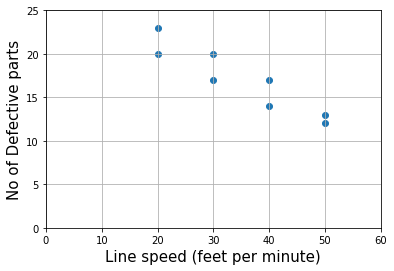

In [266]:
plt.scatter(x,y)
plt.xticks([0,10,20,30,40,50,60])
plt.yticks([0,5,10,15,20,25])
plt.grid()
plt.xlabel('Line speed (feet per minute)', fontsize=15)
plt.ylabel('No of Defective parts', fontsize=15)